# Determine classes in unlabelled data
Given a dataset without class labels, use KNN to determine classes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Explore data

In [4]:
df = pd.read_csv("Classified Data.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Clean data

In [12]:
# Re-scale feature columns so they are all normalized. If the vals are on different scales, those with larger values will have a greater distance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target = 'TARGET CLASS'
feats = [el for el in df.columns if el != target]

# Fit scaler to features
scaler.fit(df.drop(target, axis=1))
# Tranform features
scaled_feats = scaler.transform(df.drop(target, axis=1))
df_feats = pd.DataFrame(scaled_feats, columns=feats)

df_feats.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train model

In [14]:
from sklearn.model_selection import train_test_split
X = df_feats
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Select and instantiate model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# Fit model
model.fit(X_train, y_train)

# Create predictions
preds = model.predict(X_test)

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, preds))
print('Classification report:\n', classification_report(y_test, preds))

Confusion Matrix:
 [[146   9]
 [ 11 164]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       155
           1       0.95      0.94      0.94       175

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



### Improve model
Test with multiple values for "K" to determine the optimal # of classes

c:\Users\611391\Documents\Learning\ML Bootcamp\ml_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

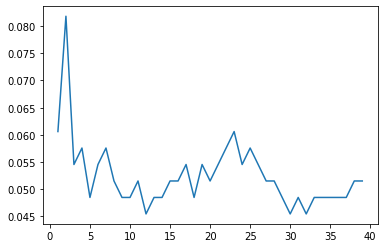

In [23]:
error_rate = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

sns.lineplot(range(1,40), error_rate)

In [24]:
# Retrain with k=12
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate model
print('Confusion Matrix:\n', confusion_matrix(y_test, preds))
print('Classification report:\n', classification_report(y_test, preds))

Confusion Matrix:
 [[149   6]
 [  9 166]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       155
           1       0.97      0.95      0.96       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

